In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Missing Values in Each Column:
PLAYER        0
POS           0
AGE           2
SEASON        0
PS            0
SCORING_GP    0
dtype: int64

Summary Statistics:
                AGE            PS
count  23589.000000  23589.000000
mean      26.566620      2.424753
std        4.434402      2.798726
min       18.000000     -2.400000
25%       23.000000      0.100000
50%       26.000000      1.500000
75%       29.000000      4.000000
max       48.000000     18.200000


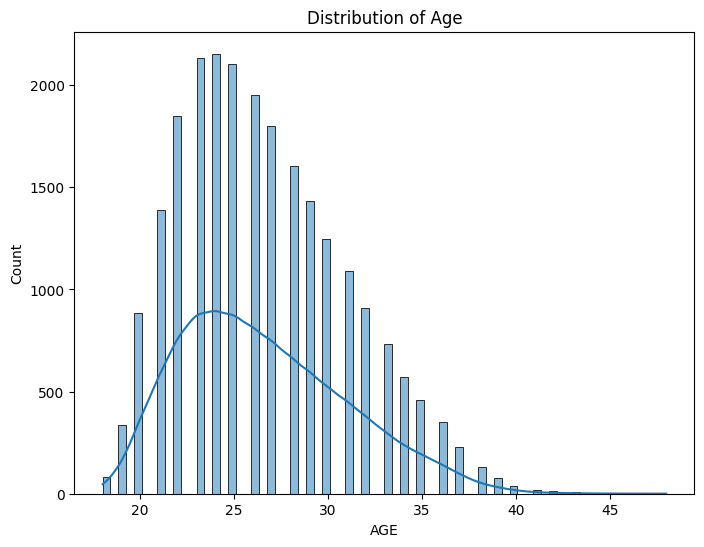

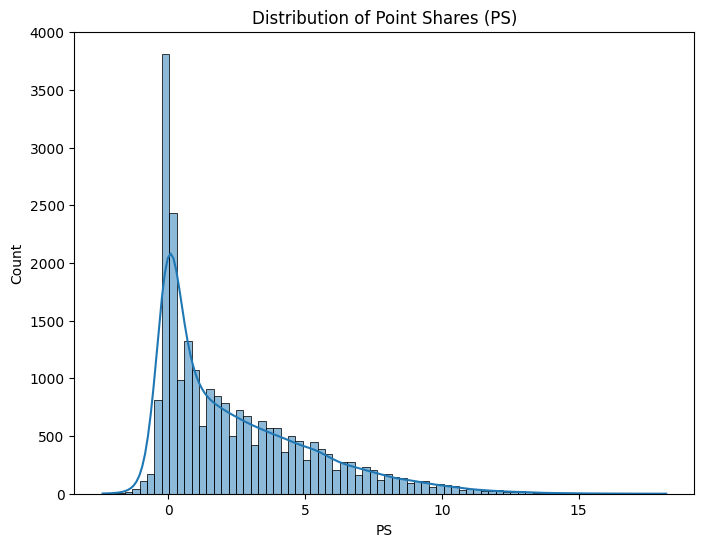


Average Point Shares (PS) by Position and Count of position:
      count        PS
POS                  
D    8152.0  2.805029
C    6605.0  2.294610
LW   4436.0  2.141524
RW   4240.0  2.249009
F     143.0  0.776923
W      13.0  2.176923


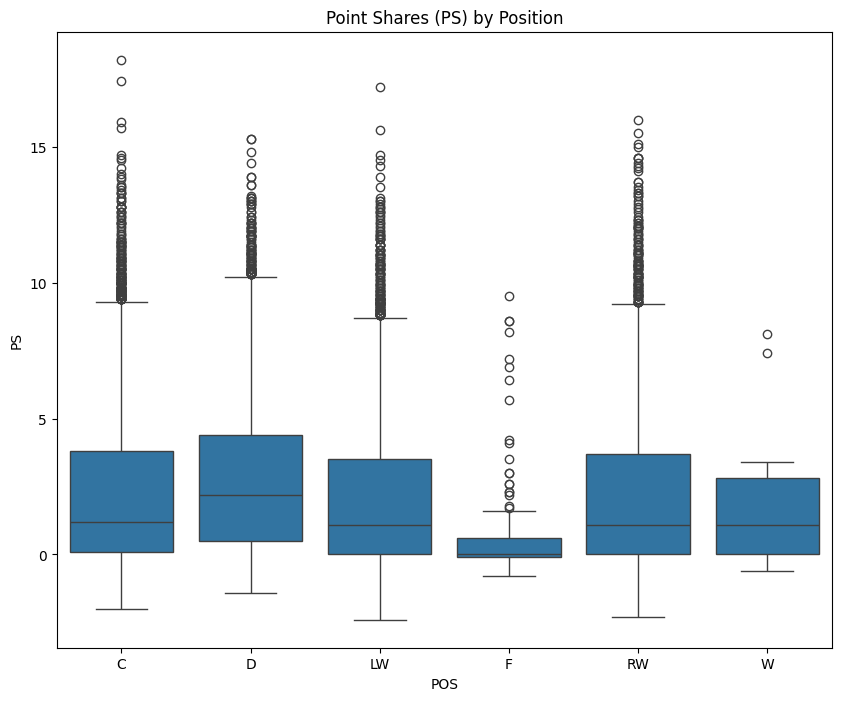


Top 10 Players with Highest Point Shares (PS):
               PLAYER POS  AGE  SEASON    PS SCORING_GP
589    Connor McDavid   C   26    2023  18.2         82
23237  Mario Lemieux*   C   30    1996  17.4         70
14054   Alex Ovechkin  LW   22    2008  17.2         82
23139    Jaromír Jágr  RW   23    1996  16.0         82
19442      Joe Sakic*   C   31    2001  15.9         82
10441   Evgeni Malkin   C   25    2012  15.7         75
12313   Alex Ovechkin  LW   24    2010  15.6         72
15537    Jaromír Jágr  RW   33    2006  15.5         82
5644      Brent Burns   D   31    2017  15.3         82
1528       Cale Makar   D   23    2022  15.3         77


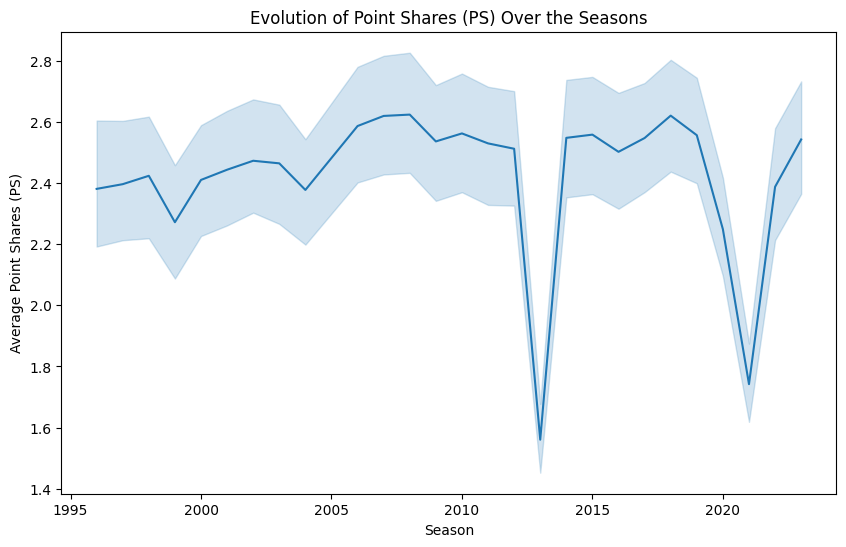

In [26]:
df_skaters = pd.read_csv("skaters_1996_2023.csv")
df_skaters = df_skaters[df_skaters['RK'] != 'Rk']

df_skaters = df_skaters[['PLAYER','POS','AGE','SEASON','PS', 'SCORING_GP']]
df_skaters['PS'] = df_skaters['PS'].astype('float64')

# Checking for missing values
print("Missing Values in Each Column:")
print(df_skaters.isnull().sum())

df_skaters = df_skaters.dropna()
df_skaters['AGE'] = df_skaters['AGE'].astype(int)

# Summary statistics
print("\nSummary Statistics:")
print(df_skaters.describe()[['AGE','PS']])

# Distribution of AGE
plt.figure(figsize=(8, 6))
sns.histplot(df_skaters['AGE'], kde=True)
plt.title('Distribution of Age')
plt.show()

# Distribution of PS
plt.figure(figsize=(8, 6))
sns.histplot(df_skaters['PS'], kde=True)
plt.title('Distribution of Point Shares (PS)')
plt.show()

# Average PS by position
avg_ps_by_pos = df_skaters.groupby('POS')['PS'].mean().sort_values(ascending=False)
pos_counts = df_skaters['POS'].value_counts().astype(int)
print("\nAverage Point Shares (PS) by Position and Count of position:")
print(pd.DataFrame([pos_counts, avg_ps_by_pos]).transpose())

# Boxplot of PS by position
plt.figure(figsize=(10, 8))
sns.boxplot(x='POS', y='PS', data=df_skaters)
plt.title('Point Shares (PS) by Position')
plt.show()

# Top 10 players with highest PS
top_players = df_skaters.sort_values(by='PS', ascending=False).head(10)
print("\nTop 10 Players with Highest Point Shares (PS):")
print(top_players)

# Convert 'SEASON' to numeric
df_skaters['SEASON'] = df_skaters['SEASON'].astype(int)

# Plotting the evolution of PS over the seasons
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_skaters, x='SEASON', y='PS')
plt.title('Evolution of Point Shares (PS) Over the Seasons')
plt.xlabel('Season')
plt.ylabel('Average Point Shares (PS)')
plt.show()



Delta Table with 'Age_Couplet' as Index:
    Age_Couplet  Players  Average_Change  Cumulative_Difference
AGE                                                            
20        20/21       66        0.003009              -0.024764
21        21/22      277        0.009908              -0.014856
22        22/23      672        0.006964              -0.007891
23        23/24     1038        0.005070              -0.002821
24        24/25     1346        0.002380              -0.000441
25        25/26     1515        0.000441               0.000000
26        26/27     1535       -0.000197              -0.000197
27        27/28     1493       -0.000358              -0.000555
28        28/29     1383       -0.002101              -0.002656
29        29/30     1281       -0.003901              -0.006557
30        30/31     1119       -0.003390              -0.009947
31        31/32      986       -0.003681              -0.013628
32        32/33      834       -0.006698              -0.02032

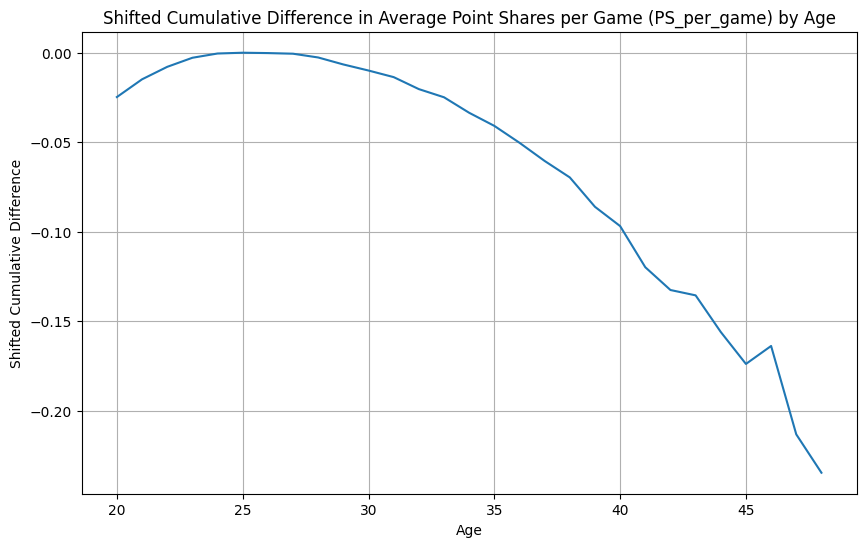

    AGE Age_Couplet  Players  Average_Change  Cumulative_Difference
19   39       39/40       75       -0.016417              -0.086079
20   40       40/41       38       -0.010772              -0.096851
21   41       41/42       17       -0.022978              -0.119829
22   42       42/43       11       -0.012729              -0.132558
23   43       43/44        6       -0.002989              -0.135547
24   44       44/45        3       -0.020466              -0.156013
25   45       45/46        2       -0.017853              -0.173865
26   46       46/47        1        0.010043              -0.163822
27   47       47/48        1       -0.049379              -0.213201
28   48       48/49        1       -0.021429              -0.234630


In [28]:
# Ensure 'AGE', 'SEASON', and 'SCORING_GP' are numeric
df_skaters[['AGE', 'SEASON', 'SCORING_GP']] = df_skaters[['AGE', 'SEASON', 'SCORING_GP']].apply(pd.to_numeric)

# Calculate PS per game
df_skaters['PS_per_game'] = df_skaters['PS'] / df_skaters['SCORING_GP']

# Sort by PLAYER and SEASON to ensure the data is in the right order
df_skaters.sort_values(['PLAYER', 'SEASON'], inplace=True)

# Calculate the difference in PS_per_game between every two consecutive seasons
df_skaters['Delta_PS'] = df_skaters.groupby('PLAYER')['PS_per_game'].diff()

# Calculate the average SCORING_GP for every two consecutive seasons
df_skaters['Avg_SCORING_GP'] = df_skaters.groupby('PLAYER')['SCORING_GP'].rolling(2).mean().reset_index(0, drop=True)

# Drop the rows for the first season of each player (since they don't have a previous season to compare)
df_skaters.dropna(subset=['Delta_PS', 'Avg_SCORING_GP'], inplace=True)

# Group by AGE and calculate the weighted average Delta_PS (weighted by Avg_SCORING_GP)
delta_ps_by_age = df_skaters.groupby('AGE').apply(lambda x: np.average(x['Delta_PS'], weights=x['Avg_SCORING_GP']))

# Group by AGE and calculate the number of players
player_counts = df_skaters.groupby('AGE').size()

# Calculate the cumulative difference in Delta_PS
cumulative_diff = delta_ps_by_age.cumsum()

# Shift the cumulative difference so that the peak is 0
shifted_cumulative_diff = cumulative_diff - cumulative_diff.max()

# Create a DataFrame for the table
delta_table = pd.DataFrame({
    'Age_Couplet': delta_ps_by_age.index.astype(str) + '/' + (delta_ps_by_age.index + 1).astype(str),
    'Players': player_counts,
    'Average_Change': delta_ps_by_age,
    'Cumulative_Difference': shifted_cumulative_diff
})

# Set 'Age_Couplet' as the index of the table
# delta_table.set_index('Age_Couplet', inplace=True)

print("\nDelta Table with 'Age_Couplet' as Index:")
print(delta_table)

# Find the age at which the cumulative difference is 0 (peak age)
peak_age = delta_table[delta_table['Cumulative_Difference'] == 0].index[0]
print("\nPeak Age: ", peak_age)

# Plotting the shifted cumulative difference against age with a grid
plt.figure(figsize=(10, 6))
sns.lineplot(data=delta_table.reset_index(), x='AGE', y='Cumulative_Difference')
plt.title('Shifted Cumulative Difference in Average Point Shares per Game (PS_per_game) by Age')
plt.xlabel('Age')
plt.ylabel('Shifted Cumulative Difference')
plt.grid(True)
plt.show()


print(delta_table.reset_index().query('AGE >= 39'))